<a href="https://colab.research.google.com/github/monclai/bootcamp_dataScience_aplicada_alura_desafios/blob/main/desafio_03/notebook/Desafio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
uri_regiao_dos_lagos = 'https://raw.githubusercontent.com/monclai/bootcamp_dataScience_aplicada_alura_desafios/main/desafio_03/dados/regiao_dos_lagos.csv'

In [ ]:
dados_regiao_dos_lagos = pd.read_csv(uri_regiao_dos_lagos)

In [ ]:
dados_regiao_dos_lagos.head()

,Unnamed: 0,city,date,epidemiological_week,estimated_population,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths
0,1514661,São Pedro da Aldeia,2020-03-31,202014,106049.0,1,0.94296,2020-03-31,0.0,0,1,0
1,1514667,Arraial do Cabo,2020-04-01,202014,30593.0,1,3.26872,2020-04-01,1.0,1,1,1
2,1514690,São Pedro da Aldeia,2020-04-01,202014,106049.0,1,0.94296,2020-04-01,0.0,0,0,0
3,1514696,Arraial do Cabo,2020-04-02,202014,30593.0,1,3.26872,2020-04-02,1.0,1,0,0
4,1514722,São Pedro da Aldeia,2020-04-02,202014,106049.0,1,0.94296,2020-04-02,0.0,0,0,0


In [ ]:
dados_regiao_dos_lagos.city.unique()

array(['São Pedro da Aldeia', 'Arraial do Cabo', 'Araruama',
       'Iguaba Grande', 'Cabo Frio', 'Saquarema', 'Armação dos Búzios'],
      dtype=object)

In [ ]:
df_cabo_frio = dados_regiao_dos_lagos.query('city == "Cabo Frio"')

In [ ]:
df_cabo_frio.tail()

,Unnamed: 0,city,date,epidemiological_week,estimated_population,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths
3148,1556325,Cabo Frio,2021-06-29,202126,230378.0,13047,5663.30118,2021-06-29,0.0523,682,91,7
3155,1556419,Cabo Frio,2021-06-30,202126,230378.0,13053,5665.90560,2021-06-30,0.0522,682,6,0
3162,1556513,Cabo Frio,2021-07-01,202126,230378.0,13101,5686.74092,2021-07-01,0.0527,691,48,9
3169,1556607,Cabo Frio,2021-07-02,202126,230378.0,13101,5686.74092,2021-07-01,0.0527,691,0,0
3176,1556701,Cabo Frio,2021-07-03,202126,230378.0,13101,5686.74092,2021-07-01,0.0527,691,0,0


In [ ]:
df_cabo_frio['date'] = pd.to_datetime(df_cabo_frio['date'], format='%Y-%m-%d')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

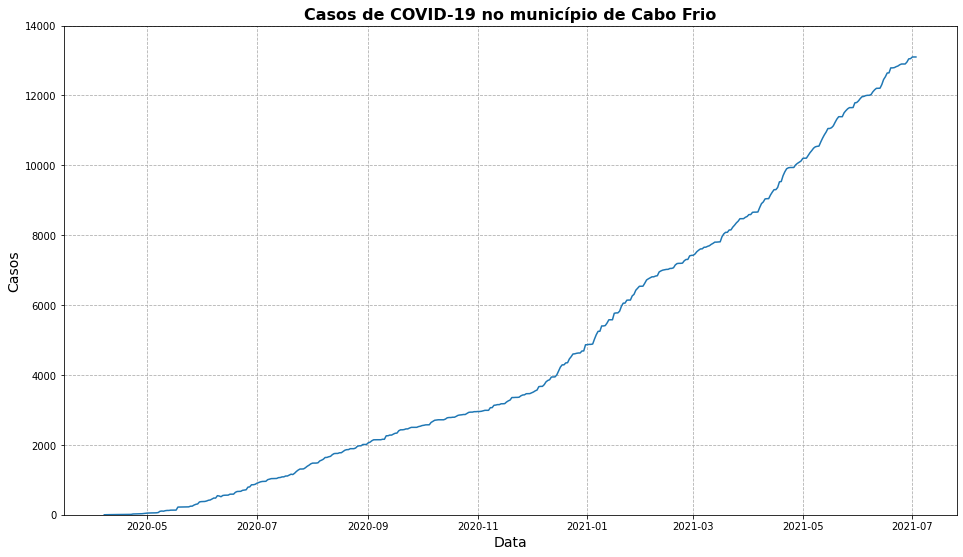

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.lineplot(x = 'date', y = 'last_available_confirmed', data = df_cabo_frio)
plt.title('Casos de COVID-19 no município de Cabo Frio', fontsize = 16, fontweight = 'bold')
plt.ylabel('Casos', fontsize = 14)
plt.xlabel('Data', fontsize = 14)
plt.ylim(0, 14000)
plt.grid(linestyle = "--")
plt.show()

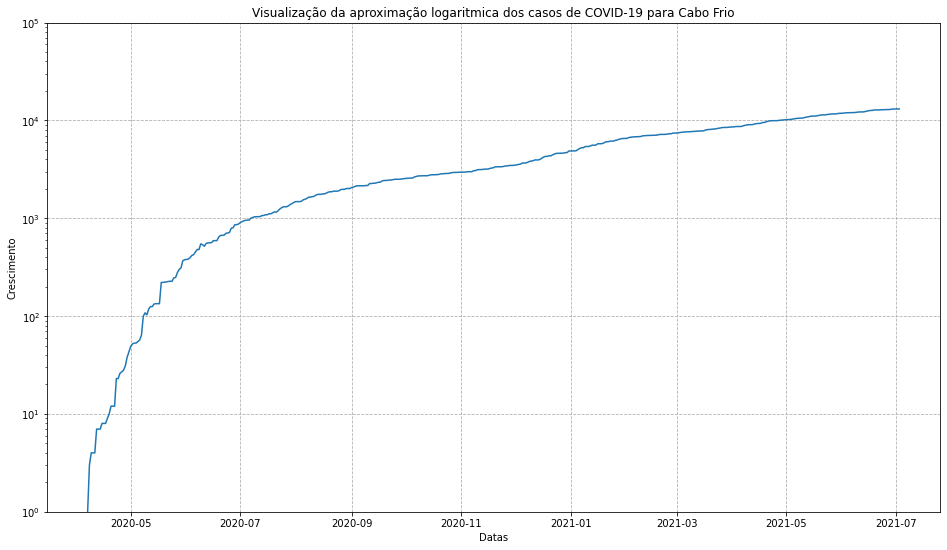

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x = 'date', y = 'last_available_confirmed', data = df_cabo_frio)
plt.yscale('log')
plt.ylabel('Crescimento')
plt.xlabel('Datas')
plt.ylim(1, 100000)
plt.title("Visualização da aproximação logaritmica dos casos de COVID-19 para Cabo Frio")
plt.grid(linestyle = "--")

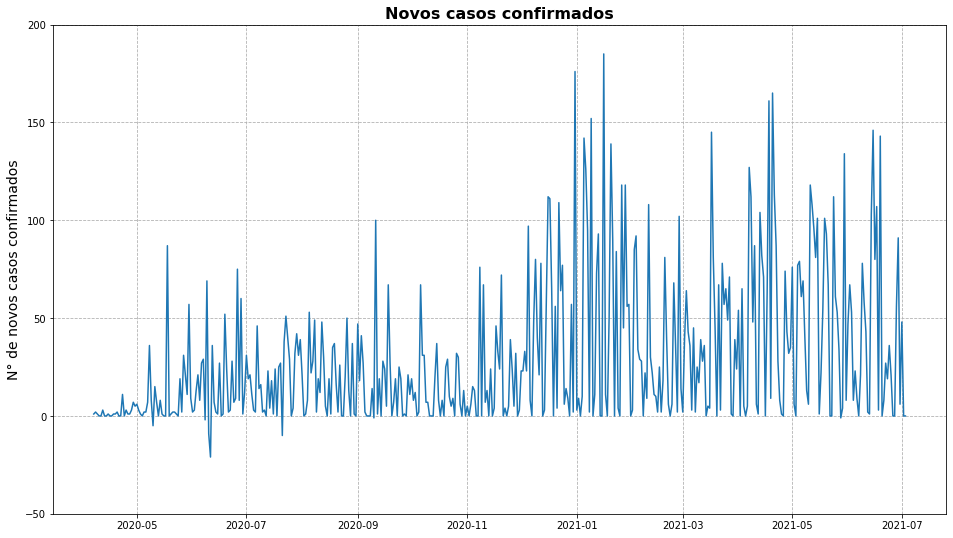

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x = 'date', y = 'new_confirmed', data = df_cabo_frio)
plt.title('Novos casos confirmados', fontsize = 16, fontweight = 'bold')
plt.ylabel('N° de novos casos confirmados', fontsize = 14)
plt.xlabel("")
plt.grid(linestyle = '--')
plt.ylim(-50, 200)
plt.show()

In [ ]:
df_cabo_frio['taxa_de_crescimento_casos'] = df_cabo_frio['new_confirmed'].diff()

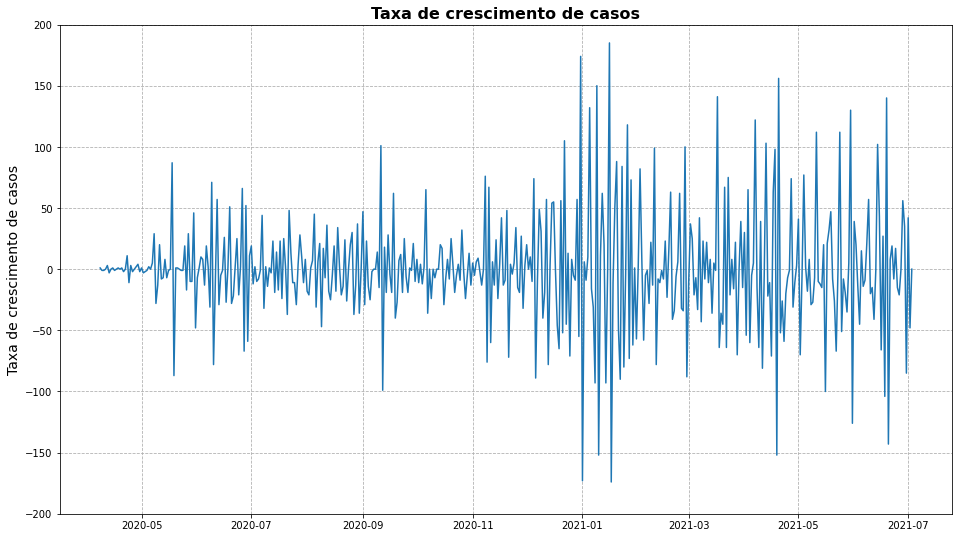

In [ ]:
plt.figure(figsize=(16,9))
sns.lineplot(x = 'date', y = 'taxa_de_crescimento_casos', data = df_cabo_frio)
plt.title('Taxa de crescimento de casos', fontsize = 16, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Taxa de crescimento de casos', fontsize = 14)
plt.ylim(-200, 200)
plt.grid(linestyle = '--')
plt.show()

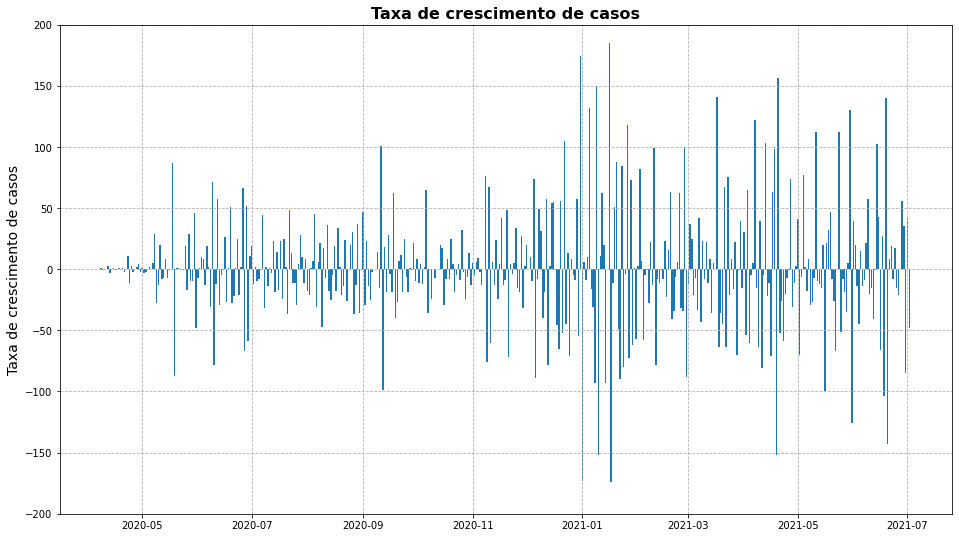

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(df_cabo_frio['date'], df_cabo_frio['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos', fontsize = 16, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Taxa de crescimento de casos', fontsize = 14)
plt.ylim(-200, 200)
plt.grid(linestyle = '--')
plt.show()

In [ ]:
df_cabo_frio['ano'] = pd.DatetimeIndex(df_cabo_frio['date']).year

In [ ]:
df_cabo_frio_2021 = df_cabo_frio.query('ano == 2021')

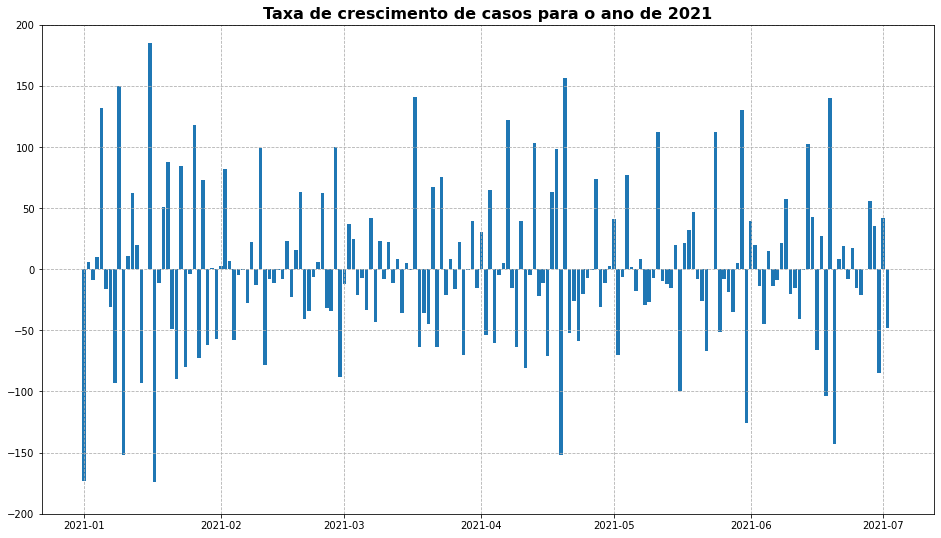

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(df_cabo_frio_2021['date'], df_cabo_frio_2021['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos para o ano de 2021', fontsize = 16, fontweight = 'bold')
plt.ylim(-200, 200)
plt.grid(linestyle = '--')
plt.show()

In [ ]:
df_cabo_frio['media_movel_casos'] = df_cabo_frio['new_confirmed'].rolling(window = 7, center = False).mean()

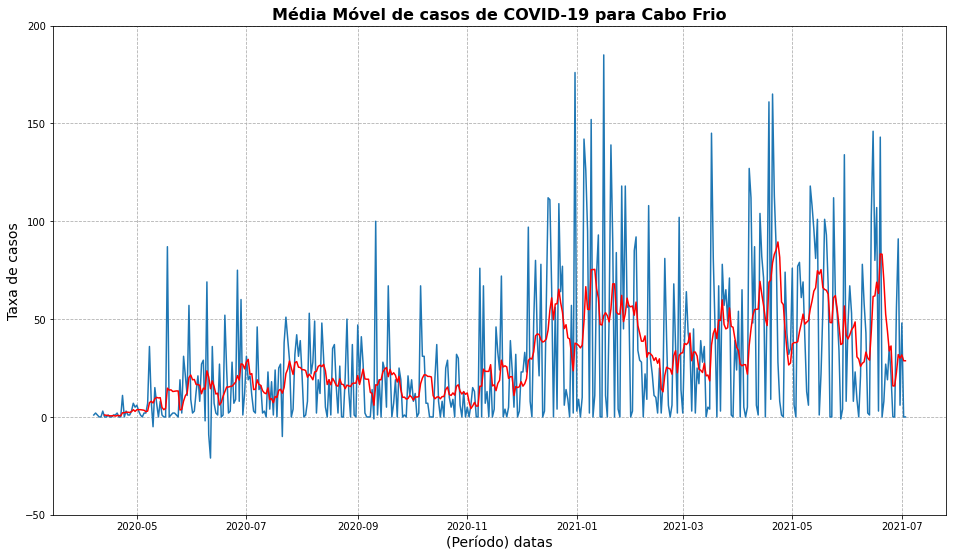

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x = 'date', y = 'new_confirmed', data = df_cabo_frio)
sns.lineplot(x = 'date', y = 'media_movel_casos', data = df_cabo_frio, color = 'red')
plt.title('Média Móvel de casos de COVID-19 para Cabo Frio', fontsize = 16, fontweight = 'bold')
plt.ylabel('Taxa de casos', fontsize = 14)
plt.xlabel('(Período) datas', fontsize = 14)
plt.ylim(-50, 200)
plt.grid(linestyle = '--')

In [ ]:
import numpy as np

In [ ]:
df_cabo_frio_2021['mes'] = pd.DatetimeIndex(df_cabo_frio_2021['date']).month

In [ ]:
df_cabo_frio_2021_01 = df_cabo_frio_2021.query('mes==1')

In [ ]:
df_cabo_frio_2021_02 = df_cabo_frio_2021.query('mes==2')

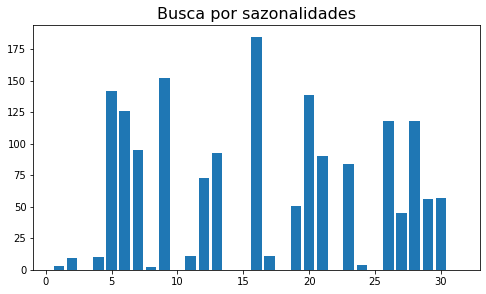

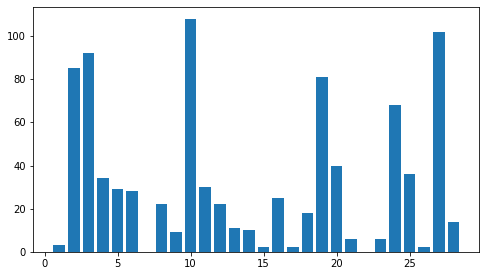

In [ ]:
plt.figure(figsize=(8, 4.5))
plt.title('Busca por sazonalidades', fontsize = 16)
plt.bar(np.linspace(1, 31, 31), df_cabo_frio_2021_01['new_confirmed'])
plt.show()
plt.figure(figsize=(8, 4.5))
plt.bar(np.linspace(1, 28, 28), df_cabo_frio_2021_02['new_confirmed'])
plt.show()

In [ ]:
df_cabo_frio.shape

(453, 15)

Buscando por sazionalidade com o auxilio do pandas

In [ ]:
from pandas.plotting import autocorrelation_plot

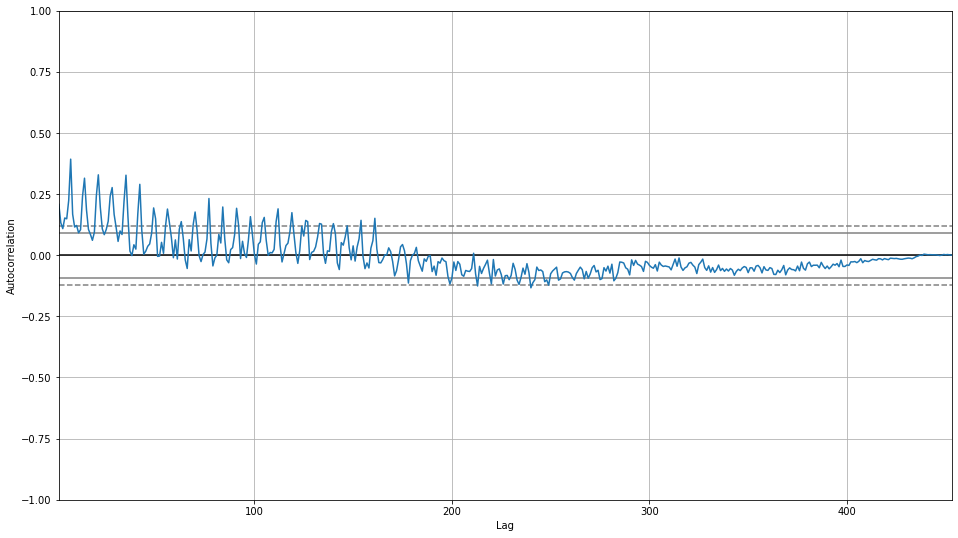

In [ ]:
plt.figure(figsize=(16, 9))
autocorrelation_plot(df_cabo_frio['new_confirmed'])

(0.0, 100.0)

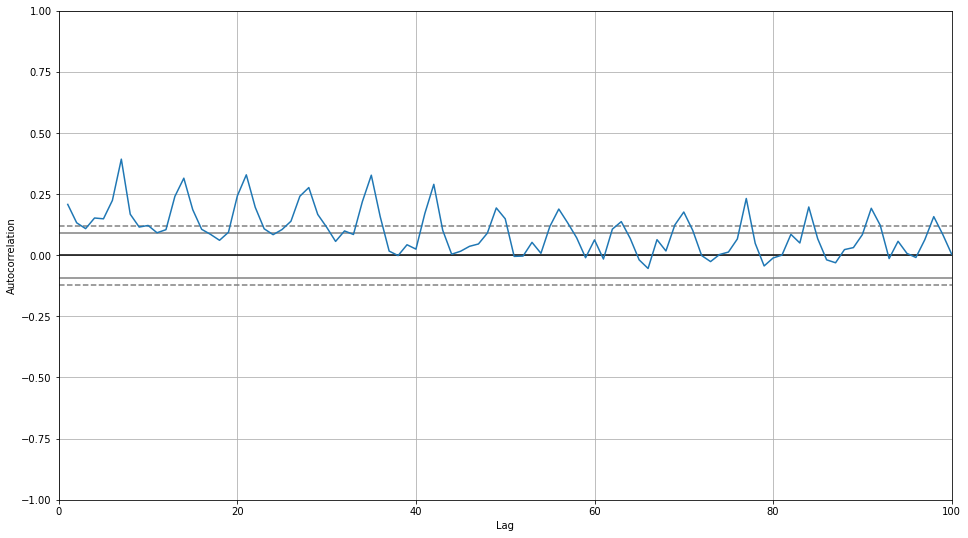

In [ ]:
plt.figure(figsize=(16, 9))
autocorrelation_plot(df_cabo_frio['new_confirmed'])
plt.xlim(0, 100)

Fazendo previsão dos dados

In [ ]:
df_cabo_frio_teste = pd.DataFrame()
df_cabo_frio_teste['ds'] = df_cabo_frio['date'][423:]
df_cabo_frio_teste['y'] = df_cabo_frio['new_confirmed'][423:]

In [ ]:
df_cabo_frio_forecasting = pd.DataFrame()

In [ ]:
df_cabo_frio_forecasting['ds'] = df_cabo_frio['date'][:423]
df_cabo_frio_forecasting['y'] = df_cabo_frio['new_confirmed'][:423]

In [ ]:
df_cabo_frio_forecasting.head()

,ds,y
23,2020-04-07,1
28,2020-04-08,2
33,2020-04-09,1
38,2020-04-10,0
43,2020-04-11,0


In [ ]:
df_cabo_frio_forecasting.tail()

,ds,y
2938,2021-05-30,134
2945,2021-05-31,8
2952,2021-06-01,47
2959,2021-06-02,67
2966,2021-06-03,53


In [ ]:
from fbprophet import Prophet

In [ ]:
feriado_carnaval_cabo_frio_2021 = ['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-26', '2021-02-27', '2021-02-28'] 

In [ ]:
feriado_carnaval = pd.DataFrame({'holiday' : 'feriado_carnaval_cabo_frio_2021',
                                 'ds' : pd.to_datetime(feriado_carnaval_cabo_frio_2021)})

In [ ]:
modelo = Prophet(n_changepoints = 75, changepoint_prior_scale=1.5, holidays=feriado_carnaval, seasonality_mode='multiplicative')

In [ ]:
modelo.add_country_holidays(country_name='BR')

In [ ]:
modelo.fit(df_cabo_frio_forecasting)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_cabo_frio_futuro = modelo.make_future_dataframe(periods = 30)

In [ ]:
previsao_cabo_frio = modelo.predict(df_cabo_frio_futuro)

In [ ]:
previsao_cabo_frio.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Souls' Day,All Souls' Day_lower,All Souls' Day_upper,Christmas,Christmas_lower,Christmas_upper,Independence Day,Independence Day_lower,Independence Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Our Lady of the Apparition,Our Lady of the Apparition_lower,Our Lady of the Apparition_upper,Republic Proclamation Day,Republic Proclamation Day_lower,Republic Proclamation Day_upper,Tiradentes,Tiradentes_lower,Tiradentes_upper,Worker's Day,Worker's Day_lower,Worker's Day_upper,feriado_carnaval_cabo_frio_2021,feriado_carnaval_cabo_frio_2021_lower,feriado_carnaval_cabo_frio_2021_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-04-07,-0.338907,-32.715031,34.825936,-0.338907,-0.338907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414355,0.414355,0.414355,0.414355,0.414355,0.414355,0.0,0.0,0.0,-0.479335
1,2020-04-08,-0.153104,-33.809837,34.143609,-0.153104,-0.153104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589417,0.589417,0.589417,0.589417,0.589417,0.589417,0.0,0.0,0.0,-0.243346
2,2020-04-09,0.032700,-34.101881,36.064754,0.032700,0.032700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.404954,0.404954,0.404954,0.404954,0.404954,0.404954,0.0,0.0,0.0,0.045941
3,2020-04-10,0.218503,-33.725017,34.896633,0.218503,0.218503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213733,-0.213733,-0.213733,-0.213733,-0.213733,-0.213733,0.0,0.0,0.0,0.171802
4,2020-04-11,0.404306,-33.788635,34.987067,0.404306,0.404306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137005,0.137005,0.137005,0.137005,0.137005,0.137005,0.0,0.0,0.0,0.459698


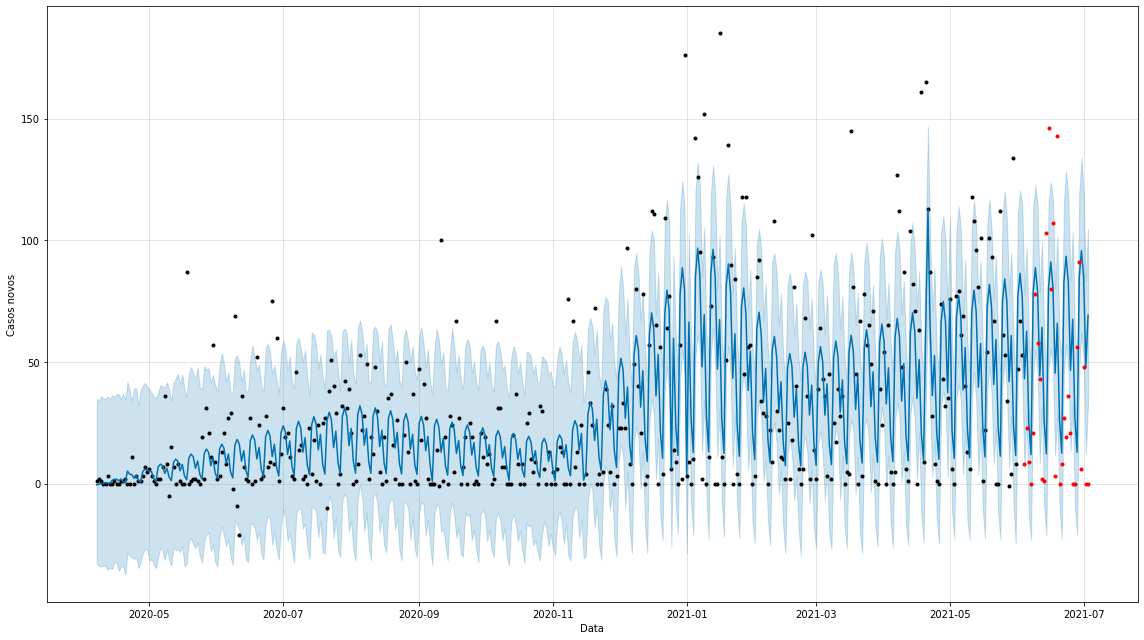

In [ ]:
modelo.plot(previsao_cabo_frio, xlabel = 'Data', ylabel = 'Casos novos', figsize=(16, 9));
plt.plot(df_cabo_frio_teste['ds'], df_cabo_frio_teste['y'], '.r')

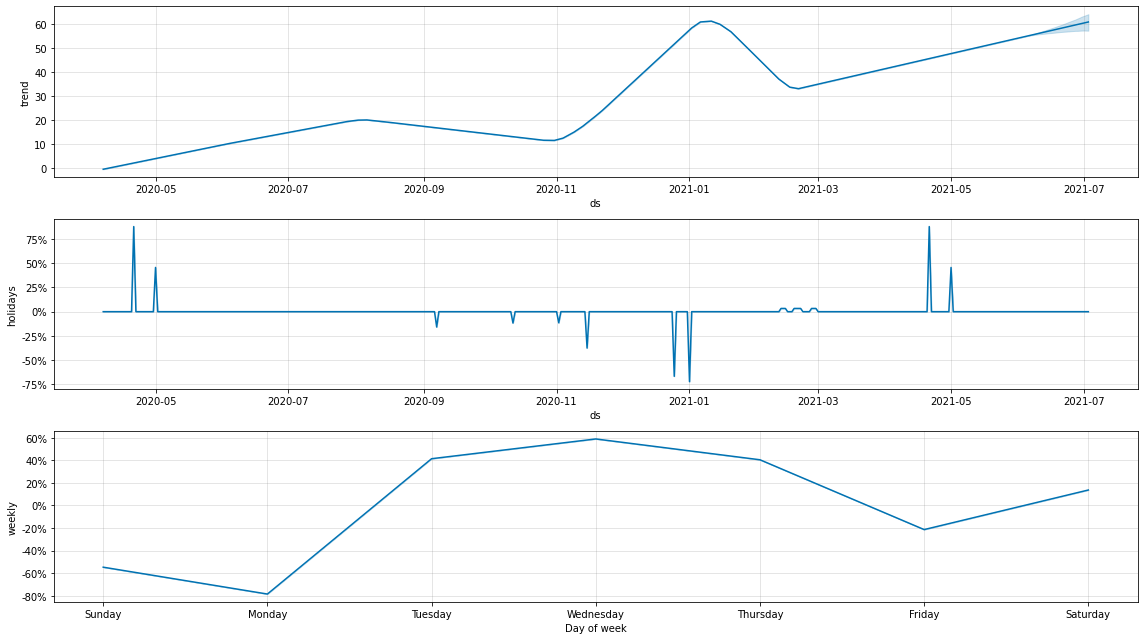

In [ ]:
modelo.plot_components(previsao_cabo_frio, figsize=(16,9));

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

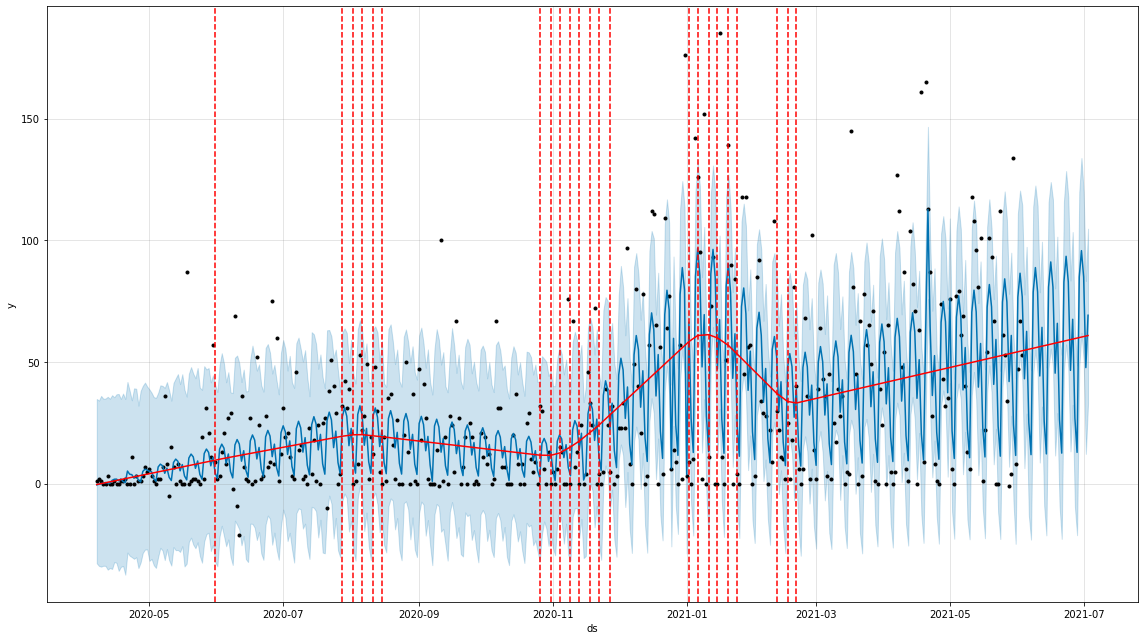

In [ ]:
fig = modelo.plot(previsao_cabo_frio, figsize=(16,9))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao_cabo_frio)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(df_cabo_frio_forecasting['y'], previsao_cabo_frio['yhat'][:423])

18.12724571632751

resultado obtido no sazionalidade aditiva:
20.93359372665444

resultado obtido com sazionalidade multiplicativa:
18.12724571632751

portanto, multiplicativa sendo melhor ajuste


Removendo outliers

In [ ]:
df_cabo_frio_forecasting_sem_outliers = df_cabo_frio_forecasting.reset_index()

In [ ]:
df_cabo_frio_forecasting_sem_outliers.head()

,index,ds,y
0,23,2020-04-07,1
1,28,2020-04-08,2
2,33,2020-04-09,1
3,38,2020-04-10,0
4,43,2020-04-11,0


In [ ]:
df_CB_sem_outliers = df_cabo_frio_forecasting_sem_outliers[
                                      (df_cabo_frio_forecasting_sem_outliers['y'] > previsao_cabo_frio['yhat_lower'][:423]) 
                                      & (df_cabo_frio_forecasting_sem_outliers['y'] < previsao_cabo_frio['yhat_upper'][:423])]

In [ ]:
cabo_frio_sem_outlier = df_CB_sem_outliers[['ds', 'y']]

In [ ]:
cabo_frio_sem_outlier.head()

,ds,y
0,2020-04-07,1
1,2020-04-08,2
2,2020-04-09,1
3,2020-04-10,0
4,2020-04-11,0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


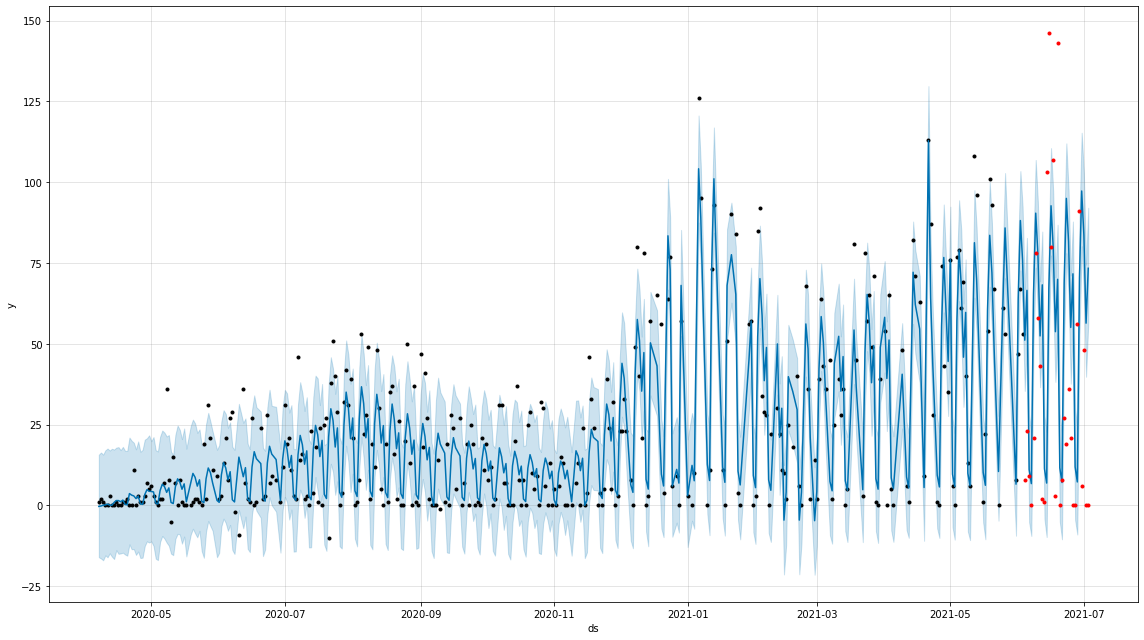

In [ ]:
modelo = Prophet(n_changepoints = 75, changepoint_prior_scale=1.5, holidays=feriado_carnaval, seasonality_mode='multiplicative')
modelo.add_country_holidays(country_name='BR')
modelo.fit(cabo_frio_sem_outlier)
df_cabo_frio_futuro = modelo.make_future_dataframe(periods = 30)
previsao_cabo_frio = modelo.predict(df_cabo_frio_futuro)
fig = modelo.plot(previsao_cabo_frio, figsize=(16,9))
plt.plot(df_cabo_frio_teste['ds'], df_cabo_frio_teste['y'], '.r')

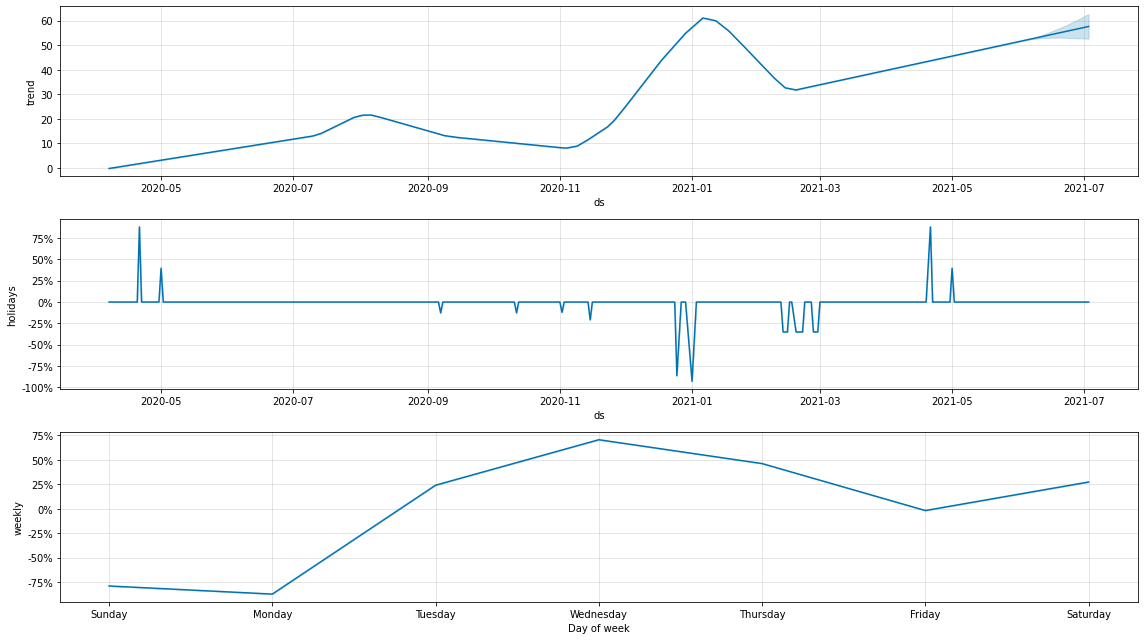

In [ ]:
modelo.plot_components(previsao_cabo_frio, figsize=(16,9));

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon='30 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2020-10-06 00:00:00 and 2021-05-04 00:00:00


In [ ]:
janela = 1

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-10-07,11.920362,-1.929719,26.505528,31,2020-10-06
1,2020-10-08,8.487710,-7.014221,22.945504,31,2020-10-06
2,2020-10-09,7.501289,-5.971452,21.991566,7,2020-10-06
3,2020-10-10,6.521256,-8.151617,20.848042,7,2020-10-06
4,2020-10-11,2.077418,-12.311884,16.889003,0,2020-10-06


In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]

In [ ]:
cutoff

array(['2020-10-06T00:00:00.000000000', '2020-11-05T00:00:00.000000000',
       '2020-12-05T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-02-03T00:00:00.000000000', '2021-03-05T00:00:00.000000000',
       '2021-04-04T00:00:00.000000000', '2021-05-04T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_p

,horizon,mse,rmse,mae,mdape,coverage
0,3 days,806.563572,28.400063,20.990740,0.752191,0.462963
1,4 days,702.724864,26.508958,20.653054,0.687516,0.420635
2,5 days,563.529895,23.738785,17.678312,0.537193,0.468254
3,6 days,319.771437,17.882154,12.418158,0.617080,0.629630
4,7 days,321.107480,17.919472,10.394090,0.423301,0.750000
5,8 days,688.393708,26.237258,13.923475,0.404988,0.796296
6,9 days,850.372711,29.161151,18.802983,0.742046,0.638889
7,10 days,1013.966062,31.842834,21.702254,0.641975,0.541667
8,11 days,842.159289,29.019981,19.843005,0.545402,0.541667
9,12 days,746.735632,27.326464,18.569777,0.719386,0.595238


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

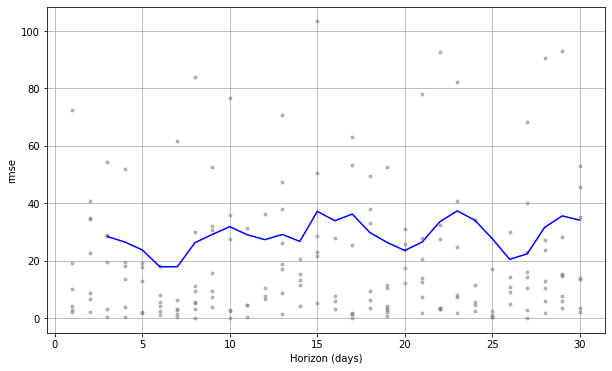

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

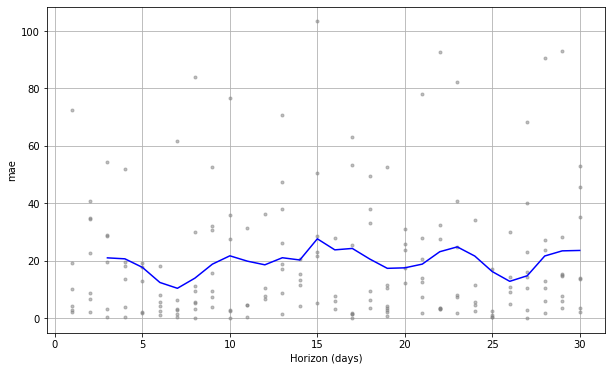

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae');